# Model Training Test

Small scale test to train a KNN model

In [13]:
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn as sk
import matplotlib as plt
%matplotlib inline

In [19]:
df = pd.read_csv('Model Training\Test Data\ExpTestData1.csv', )

In [51]:
df.head()

Timestamp    X     Y BTN_TOUCH  TOUCH_MAJOR  TOUCH_MINOR  TRACKING_ID  \
0   0.000000  350  1404      DOWN           11         -420         2526   
1   0.032676  348  1406      HELD           11         -420         2526   
2   0.042109  347  1408      HELD           11         -420         2526   
3   0.049881  344  1411      HELD           11         -420         2526   
4   0.058581  340  1416      HELD           11         -420         2526   

   PRESSURE  FINGER  USER  
0        38       0     0  
1        38       0     0  
2        38       0     0  
3        38       0     0  
4        38       0     0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1998 non-null   float64
 1   X            1998 non-null   int64  
 2   Y            1998 non-null   int64  
 3   BTN_TOUCH    1991 non-null   object 
 4   TOUCH_MAJOR  1998 non-null   int64  
 5   TOUCH_MINOR  1998 non-null   int64  
 6   TRACKING_ID  1998 non-null   int64  
 7   PRESSURE     1998 non-null   int64  
 8   FINGER       1998 non-null   int64  
 9   USER         1998 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 156.2+ KB


In [37]:
df.describe()

Timestamp            X            Y  TOUCH_MAJOR  TOUCH_MINOR  \
count  1998.000000  1998.000000  1998.000000  1998.000000       1998.0   
mean      5.923562   390.512012   859.511512   -16.473473       -420.0   
std       3.985895   132.756812   641.278529   103.827990          0.0   
min       0.000000  -420.000000  -420.000000  -420.000000       -420.0   
25%       2.591230   322.000000   266.000000    10.000000       -420.0   
50%       5.343774   394.000000   670.000000    10.000000       -420.0   
75%       9.069673   492.000000  1581.750000    11.000000       -420.0   
max      14.027356   698.000000  1872.000000    11.000000       -420.0   

        TRACKING_ID     PRESSURE       FINGER         USER  
count  1.998000e+03  1998.000000  1998.000000  1998.000000  
mean   1.526241e+09    -4.457457     0.218218     0.500000  
std    2.056174e+09   110.695507     0.413140     0.500125  
min   -4.200000e+02  -420.000000     0.000000     0.000000  
25%    2.534000e+03    19.000000     0.000000     0.000000  
50%    3.546000e+03    23.000000     0.000000     0.500000  
75%    4.294967e+09    27.000000     0.000000     1.000000  
max    4.294967e+09    40.000000     1.000000     1.000000

# Feature Extraction

Idk if this is feature extraction per say. But BTN_TOUCH needs to be converted to a numerical value

Maybe more of data cleaning...

In [64]:
cat_feats = ['BTN_TOUCH']

In [45]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

When we do drop_first=True it gets rid of the column for BTN_TOUCH_DOWN. I think this is so the columns are not perfect predictors of each other.

In [59]:
final_data.head()

Timestamp    X     Y  TOUCH_MAJOR  TOUCH_MINOR  TRACKING_ID  PRESSURE  \
0   0.000000  350  1404           11         -420         2526        38   
1   0.032676  348  1406           11         -420         2526        38   
2   0.042109  347  1408           11         -420         2526        38   
3   0.049881  344  1411           11         -420         2526        38   
4   0.058581  340  1416           11         -420         2526        38   

   FINGER  USER  BTN_TOUCH_HELD  BTN_TOUCH_UP  
0       0     0               0             0  
1       0     0               1             0  
2       0     0               1             0  
3       0     0               1             0  
4       0     0               1             0

Does the data need to be scaled? I don't see why it would need to be scaled but the Udemy KNN course example did scale the data

# Real Feature Extraction

Separate data into sequences of 128 events approx 1.6 seconds per event. Consider in the future separating differently (different number of events, separate when touch turns to hold, when different fingers interact, etc.)

In [100]:
features = final_data.copy(deep=True)
features.insert(len(features.columns), "X_Speed", 0)
features.insert(len(features.columns), "Y_Speed", 0)
features.insert(len(features.columns), "Speed", 0)
features.insert(len(features.columns), "X_Acceleration", 0)
features.insert(len(features.columns), "Y_Acceleration", 0)
features.insert(len(features.columns), "Acceleration", 0)
features.insert(len(features.columns), "Jerk", 0)
features.insert(len(features.columns), "Path_Tangent", 0)
features.insert(len(features.columns), "Ang_V", 0)

In [101]:
features.head()

Timestamp    X     Y  TOUCH_MAJOR  TOUCH_MINOR  TRACKING_ID  PRESSURE  \
0   0.000000  350  1404           11         -420         2526        38   
1   0.032676  348  1406           11         -420         2526        38   
2   0.042109  347  1408           11         -420         2526        38   
3   0.049881  344  1411           11         -420         2526        38   
4   0.058581  340  1416           11         -420         2526        38   

   FINGER  USER  BTN_TOUCH_HELD  BTN_TOUCH_UP  X_Speed  Y_Speed  Speed  \
0       0     0               0             0        0        0      0   
1       0     0               1             0        0        0      0   
2       0     0               1             0        0        0      0   
3       0     0               1             0        0        0      0   
4       0     0               1             0        0        0      0   

   X_Acceleration  Y_Acceleration  Acceleration  Jerk  Path_Tangent  Ang_V  
0               0               0             0     0             0      0  
1               0               0             0     0             0      0  
2               0               0             0     0             0      0  
3               0               0             0     0             0      0  
4               0               0             0     0             0      0

In [102]:
features['X_Speed'] = (features.X - features.X.shift(1)) / (features.Timestamp - features.Timestamp.shift(1))
features['Y_Speed'] = (features.Y - features.Y.shift(1)) / (features.Timestamp - features.Timestamp.shift(1))
features['Speed'] = np.sqrt((features.X_Speed ** 2) + (features.Y_Speed ** 2))
features['X_Acceleration'] = (features.X_Speed - features.X_Speed.shift(1)) / (features.Timestamp - features.Timestamp.shift(1))
features['Y_Acceleration'] = (features.Y_Speed - features.Y_Speed.shift(1)) / (features.Timestamp - features.Timestamp.shift(1))
features['Acceleration'] = (features.Speed - features.Speed.shift(1)) / (features.Timestamp - features.Timestamp.shift(1))
features['Jerk'] = (features.Acceleration - features.Acceleration.shift(1)) / (features.Timestamp - features.Timestamp.shift(1))
features['Path_Tangent'] = np.arctan2((features.Y - features.Y.shift(1)), (features.X - features.X.shift(1)))
features['Ang_V'] = (features.Path_Tangent - features.Path_Tangent.shift(1)) / (features.Timestamp - features.Timestamp.shift(1))

In [103]:
features.head()

Timestamp    X     Y  TOUCH_MAJOR  TOUCH_MINOR  TRACKING_ID  PRESSURE  \
0   0.000000  350  1404           11         -420         2526        38   
1   0.032676  348  1406           11         -420         2526        38   
2   0.042109  347  1408           11         -420         2526        38   
3   0.049881  344  1411           11         -420         2526        38   
4   0.058581  340  1416           11         -420         2526        38   

   FINGER  USER  BTN_TOUCH_HELD  BTN_TOUCH_UP     X_Speed     Y_Speed  \
0       0     0               0             0         NaN         NaN   
1       0     0               1             0  -61.207002   61.207002   
2       0     0               1             0 -106.010813  212.021626   
3       0     0               1             0 -386.001029  386.001029   
4       0     0               1             0 -459.770115  574.712644   

        Speed  X_Acceleration  Y_Acceleration  Acceleration          Jerk  \
0         NaN             NaN             NaN           NaN           NaN   
1   86.559772             NaN             NaN           NaN           NaN   
2  237.047384    -4749.688438    15987.980934  15953.314113           NaN   
3  545.887891   -36025.503880    22385.409554  39737.584434  3.060251e+06   
4  735.991292    -8479.205253    21690.990167  21850.965635 -2.055933e+06   

   Path_Tangent      Ang_V  
0           NaN        NaN  
1      2.356194        NaN  
2      2.034444 -34.109038  
3      2.356194  41.398682  
4      2.245537 -12.719221

In [126]:
features = features.fillna(0)

In [129]:
features.head()

Timestamp    X     Y  TOUCH_MAJOR  TOUCH_MINOR  TRACKING_ID  PRESSURE  \
0   0.000000  350  1404           11         -420         2526        38   
1   0.032676  348  1406           11         -420         2526        38   
2   0.042109  347  1408           11         -420         2526        38   
3   0.049881  344  1411           11         -420         2526        38   
4   0.058581  340  1416           11         -420         2526        38   

   FINGER  USER  BTN_TOUCH_HELD  BTN_TOUCH_UP     X_Speed     Y_Speed  \
0       0     0               0             0    0.000000    0.000000   
1       0     0               1             0  -61.207002   61.207002   
2       0     0               1             0 -106.010813  212.021626   
3       0     0               1             0 -386.001029  386.001029   
4       0     0               1             0 -459.770115  574.712644   

        Speed  X_Acceleration  Y_Acceleration  Acceleration          Jerk  \
0    0.000000        0.000000        0.000000      0.000000  0.000000e+00   
1   86.559772        0.000000        0.000000      0.000000  0.000000e+00   
2  237.047384    -4749.688438    15987.980934  15953.314113  0.000000e+00   
3  545.887891   -36025.503880    22385.409554  39737.584434  3.060251e+06   
4  735.991292    -8479.205253    21690.990167  21850.965635 -2.055933e+06   

   Path_Tangent      Ang_V  
0      0.000000   0.000000  
1      2.356194   0.000000  
2      2.034444 -34.109038  
3      2.356194  41.398682  
4      2.245537 -12.719221

In [127]:
features.drop(labels=['Timestamp','X','Y','TRACKING_ID'], axis=1)

TOUCH_MAJOR  TOUCH_MINOR  PRESSURE  FINGER  USER  BTN_TOUCH_HELD  \
0              11         -420        38       0     0               0   
1              11         -420        38       0     0               1   
2              11         -420        38       0     0               1   
3              11         -420        38       0     0               1   
4              11         -420        38       0     0               1   
...           ...          ...       ...     ...   ...             ...   
1993           10         -420        25       0     1               1   
1994           10         -420        25       0     1               1   
1995           10         -420        25       0     1               1   
1996           10         -420        25       0     1               1   
1997           10         -420        25       0     1               1   

      BTN_TOUCH_UP      X_Speed     Y_Speed        Speed  X_Acceleration  \
0                0     0.000000    0.000000     0.000000        0.000000   
1                0   -61.207002   61.207002    86.559772        0.000000   
2                0  -106.010813  212.021626   237.047384    -4749.688438   
3                0  -386.001029  386.001029   545.887891   -36025.503880   
4                0  -459.770115  574.712644   735.991292    -8479.205253   
...            ...          ...         ...          ...             ...   
1993             0    30.041758    0.000000    30.041758     -900.719547   
1994             0   -10.951703  -10.951703    15.488047     -448.948210   
1995             0    14.987336  -14.987336    21.195293      388.757081   
1996             0   118.511496  118.511496   167.600564    12268.803021   
1997             0  2635.519616  -59.898173  2636.200190   150764.188105   

      Y_Acceleration   Acceleration          Jerk  Path_Tangent       Ang_V  
0           0.000000       0.000000  0.000000e+00      0.000000    0.000000  
1           0.000000       0.000000  0.000000e+00      2.356194    0.000000  
2       15987.980934   15953.314113  0.000000e+00      2.034444  -34.109038  
3       22385.409554   39737.584434  3.060251e+06      2.356194   41.398682  
4       21690.990167   21850.965635 -2.055933e+06      2.245537  -12.719221  
...              ...            ...           ...           ...         ...  
1993    -7212.907093   -6532.387227           inf      0.000000  -39.829893  
1994     -119.939798    -159.387922  6.979520e+04     -2.356194  -25.804342  
1995      -60.483382      85.536419  3.670763e+03     -0.785398   23.542052  
1996    15821.146160   17350.707627  2.046121e+06      0.785398  186.157422  
1997   -10686.413218  147864.607656  7.817544e+06     -0.022723  -48.405003  

[1998 rows x 16 columns]

In [128]:
features.describe()

C:\Users\skigu\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Timestamp            X            Y  TOUCH_MAJOR  TOUCH_MINOR  \
count  1998.000000  1998.000000  1998.000000  1998.000000       1998.0   
mean      5.923562   390.512012   859.511512   -16.473473       -420.0   
std       3.985895   132.756812   641.278529   103.827990          0.0   
min       0.000000  -420.000000  -420.000000  -420.000000       -420.0   
25%       2.591230   322.000000   266.000000    10.000000       -420.0   
50%       5.343774   394.000000   670.000000    10.000000       -420.0   
75%       9.069673   492.000000  1581.750000    11.000000       -420.0   
max      14.027356   698.000000  1872.000000    11.000000       -420.0   

        TRACKING_ID     PRESSURE       FINGER         USER  BTN_TOUCH_HELD  \
count  1.998000e+03  1998.000000  1998.000000  1998.000000     1998.000000   
mean   1.526241e+09    -4.457457     0.218218     0.500000        0.987487   
std    2.056174e+09   110.695507     0.413140     0.500125        0.111185   
min   -4.200000e+02  -420.000000     0.000000     0.000000        0.000000   
25%    2.534000e+03    19.000000     0.000000     0.000000        1.000000   
50%    3.546000e+03    23.000000     0.000000     0.500000        1.000000   
75%    4.294967e+09    27.000000     0.000000     1.000000        1.000000   
max    4.294967e+09    40.000000     1.000000     1.000000        1.000000   

       BTN_TOUCH_UP      X_Speed      Y_Speed         Speed  X_Acceleration  \
count   1998.000000  1998.000000  1998.000000  1.998000e+03    1.998000e+03   
mean       0.004004          NaN          NaN           inf             NaN   
std        0.063166          NaN          NaN           NaN             NaN   
min        0.000000         -inf         -inf  0.000000e+00            -inf   
25%        0.000000  -357.899209  -574.318726  1.747345e+02   -2.383521e+05   
50%        0.000000     0.000000     0.000000  8.235295e+02    0.000000e+00   
75%        0.000000   468.522313   428.787679  1.918239e+05    3.204669e+06   
max        1.000000          inf          inf           inf             inf   

       Y_Acceleration  Acceleration          Jerk  Path_Tangent        Ang_V  
count    1.998000e+03  1.998000e+03  1.998000e+03   1998.000000  1998.000000  
mean              NaN           NaN           NaN      0.103024          NaN  
std               NaN           NaN           NaN      1.574400          NaN  
min              -inf          -inf          -inf     -3.134696         -inf  
25%     -2.150611e+07 -2.151723e+07 -4.583915e+06     -1.420424  -309.124157  
50%     -1.659972e+03 -4.826540e+02  3.308623e+05      0.000000    -5.448930  
75%      5.563433e+04  7.146355e+04           NaN      1.667927   270.612023  
max               inf           inf           inf      3.141593          inf

# Scaling, Standardizing, Normalizing

Check for null values

C:\Users\skigu\anaconda3\lib\site-packages\matplotlib\colors.py:1253: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\skigu\anaconda3\lib\site-packages\matplotlib\colors.py:1254: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


<AxesSubplot:>

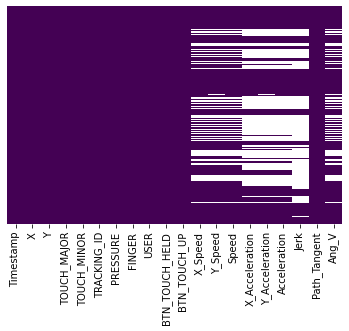

In [130]:
sb.heatmap(features,yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sb.heatmap(features.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
scaler.fit(features.drop('USER',axis=1))

C:\Users\skigu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

# Train Test Split

70:30

In [109]:
X = features
y = features['USER']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors=1)

In [114]:
knn.fit(X_train, y_train)

C:\Users\skigu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Predict and Evaluate

In [60]:
pred = knn.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(confusion_matrix(y_test, pred))

[[287   2]
 [  1 310]]
